In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [2]:
df=pd.read_csv(r"C:\Users\kushw\Downloads\DS_Case_Study_beer-ratings_2020 (2)\DS_Case_Study_beer-ratings_2020\train.csv")

In [3]:
df

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,"{'min': 56, 'hour': 23, 'mday': 10, 'sec': 1, ...",1207871761,NaN,NaN,NaN,NaN,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,"{'min': 45, 'hour': 5, 'mday': 10, 'sec': 14, ...",1263102314,NaN,NaN,NaN,NaN,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,"{'min': 3, 'hour': 1, 'mday': 25, 'sec': 36, '...",1067043816,NaN,NaN,NaN,NaN,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,"{'min': 52, 'hour': 19, 'mday': 29, 'sec': 33,...",1296330753,NaN,NaN,NaN,NaN,Stockfan42


In [4]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [6]:
train_data=df.drop(["review/timeStruct","review/timeUnix","user/ageInSeconds","user/birthdayRaw","user/birthdayUnix","user/gender"],axis=1, inplace=False)
train_data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,Redrover
37496,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,jmerloni
37497,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,UncleJimbo
37498,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,Stockfan42


In [7]:
train_data.isna().sum()


index                 0
beer/ABV              0
beer/beerId           0
beer/brewerId         0
beer/name             0
beer/style            0
review/appearance     0
review/aroma          0
review/overall        0
review/palate         0
review/taste          0
review/text          10
user/profileName      5
dtype: int64

In [8]:
train_data.dropna(inplace=True)

train_data.reset_index(drop=True, inplace=True)

In [9]:
train_data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,Redrover
37481,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,jmerloni
37482,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,UncleJimbo
37483,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,Stockfan42


In [10]:
train_data.drop_duplicates(subset=['beer/ABV','beer/beerId','beer/brewerId','beer/name','beer/style','review/appearance','review/aroma','review/overall','review/palate','review/taste','review/text'], inplace=True)
train_data.reset_index(drop=True, inplace=True)

In [11]:
train_data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,Redrover
37481,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,jmerloni
37482,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,UncleJimbo
37483,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,Stockfan42


In [12]:
len(train_data["beer/beerId"].unique())

1731

In [13]:
len(train_data["beer/style"].unique())

95

In [14]:
len(train_data["review/overall"].unique())

10

In [15]:
len(train_data["user/profileName"].unique())

7439

In [16]:
len(train_data["index"].unique())

37485

In [17]:
train_data.groupby(["user/profileName"]).count().sort_values(by="index", ascending=False)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
user/profileName,,,,,,,,,,,,
northyorksammy,141,141,141,141,141,141,141,141,141,141,141,141
BuckeyeNation,110,110,110,110,110,110,110,110,110,110,110,110
mikesgroove,92,92,92,92,92,92,92,92,92,92,92,92
ChainGangGuy,84,84,84,84,84,84,84,84,84,84,84,84
MasterSki,83,83,83,83,83,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...,...,...,...
Rjhami,1,1,1,1,1,1,1,1,1,1,1,1
Rijtjeshuis,1,1,1,1,1,1,1,1,1,1,1,1
Riggsy,1,1,1,1,1,1,1,1,1,1,1,1


In [18]:

beer_rating_counts = train_data.groupby(['beer/beerId', 'review/overall']).size().reset_index(name='count')

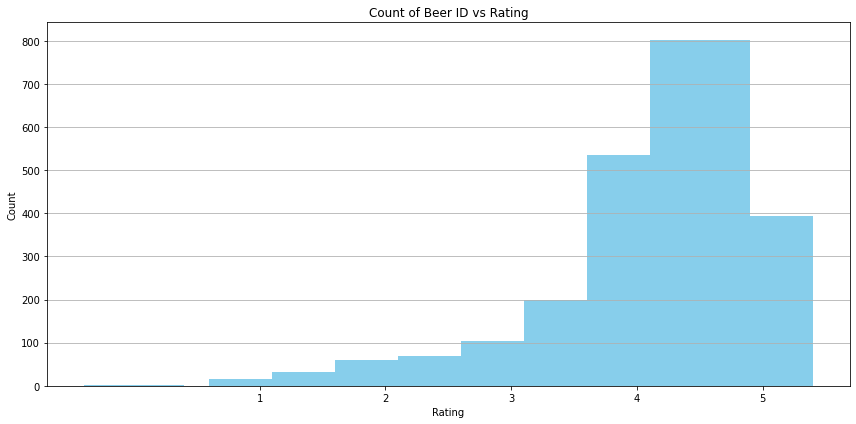

In [19]:
plt.figure(figsize=(12, 6))
plt.bar(beer_rating_counts['review/overall'], beer_rating_counts['count'], color='skyblue')
plt.title('Count of Beer ID vs Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
beer_rating_counts.sort_values(by="count", ascending=False)

,beer/beerId,review/overall,count
1000,11757,4.5,803
1478,19960,4.5,585
999,11757,4.0,536
590,5441,4.0,492
746,7463,4.0,470
...,...,...,...
1320,17124,4.0,1
2871,45318,4.0,1
2872,45344,3.5,1
2873,45347,3.5,1


In [21]:
train_data[train_data['beer/beerId'] == 22450.0]

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/profileName
951,35174,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,2.0,1.5,1.5,3.0,2.0,12 oz. brown bottle into a glass stein\t\tA - ...,brichaz
1369,35219,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.0,3.0,2.5,2.5,Pours a dark brown color with very little head...,clvand0
2193,35205,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.5,4.0,3.0,3.0,3.0,Served in the 12 oz. bottle into a snifter. Th...,beergeek279
3051,35191,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,2.5,3.0,3.0,3.0,3.0,This beer pours an amber red color with a very...,treedoctor5002
4414,35214,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.0,2.0,3.0,2.0,2.5,"No freshness date on bottle, but on the box it...",Dertbert
4503,35179,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.0,3.5,3.0,3.0,3.0,Pours an amber color with ruby hues. Has one f...,Goliath
5754,35206,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.5,3.0,3.0,3.5,3.0,Picked up a single at Steve's Liquor here in M...,Golden2wenty1
6065,35178,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.5,4.0,3.5,4.0,3.5,A - a dark almost rubyish red brown color...ha...,brewgetter
7100,35186,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.5,2.0,4.0,4.0,4.0,I'm very much surprised to see the rating of t...,BeerBelcher
7777,35177,5.5,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,3.0,3.5,3.5,3.0,3.0,A - Pours medium brown in color with hints of ...,csmiley


In [22]:
beer_ratings_summary = train_data.groupby('beer/beerId').agg({'review/overall': ['mean', 'count'],
                                                               'review/appearance': 'mean',
                                                               'review/aroma': 'mean',
                                                               'review/palate': 'mean',
                                                               'review/taste': 'mean'}).reset_index()

beer_ratings_summary.columns = ['beer/beerId', 
                                'mean_overall_rating', 'count_of_occurrences',
                                'mean_appearance_rating',
                                'mean_aroma_rating', 
                                'mean_palate_rating', 
                                'mean_taste_rating']

In [23]:
beer_ratings_summary.sort_values(by="count_of_occurrences", ascending=False)

,beer/beerId,mean_overall_rating,count_of_occurrences,mean_appearance_rating,mean_aroma_rating,mean_palate_rating,mean_taste_rating
231,11757,4.360786,1882,4.365037,4.413390,4.383103,4.503719
394,19960,4.387344,1438,4.374826,4.563630,4.483658,4.626217
114,5441,4.148166,1063,4.049859,4.086077,4.019755,4.129351
315,16074,4.210276,1051,4.181256,4.174596,4.109895,4.254995
155,7463,3.930315,983,3.961851,3.942014,3.978128,4.090031
...,...,...,...,...,...,...,...
1045,49707,3.000000,1,3.000000,1.500000,2.500000,2.000000
1048,49748,4.500000,1,4.000000,3.000000,4.500000,4.500000
1053,49949,4.000000,1,3.500000,4.000000,4.000000,4.000000
1054,49959,3.000000,1,3.000000,3.000000,2.500000,2.500000


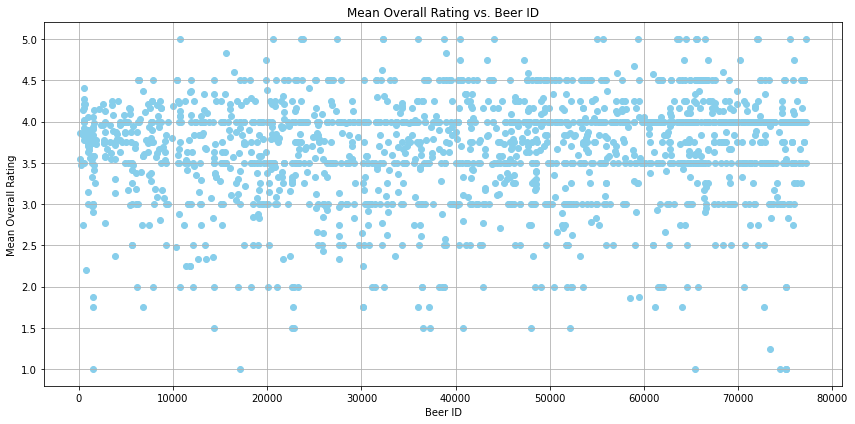

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['beer/beerId'], beer_ratings_summary['mean_overall_rating'], color='skyblue')
plt.title('Mean Overall Rating vs. Beer ID')
plt.xlabel('Beer ID')
plt.ylabel('Mean Overall Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

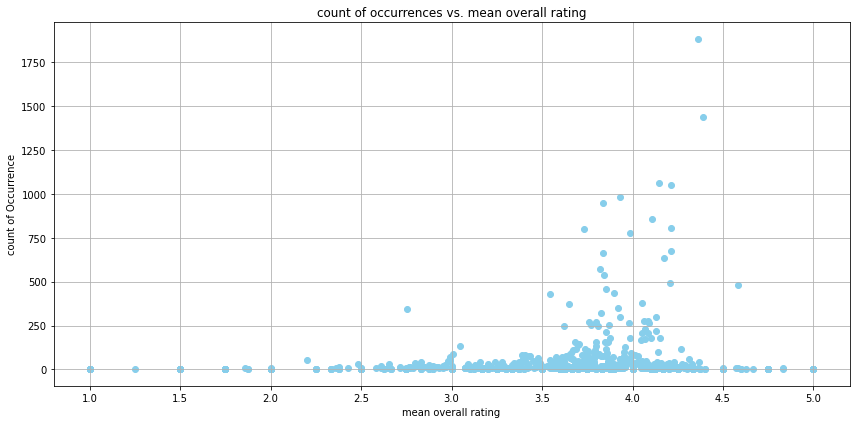

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['mean_overall_rating'], beer_ratings_summary['count_of_occurrences'], color='skyblue')
plt.title('count of occurrences vs. mean overall rating')
plt.xlabel('mean overall rating')
plt.ylabel('count of Occurrence')
plt.grid(True)
plt.tight_layout()
plt.show()

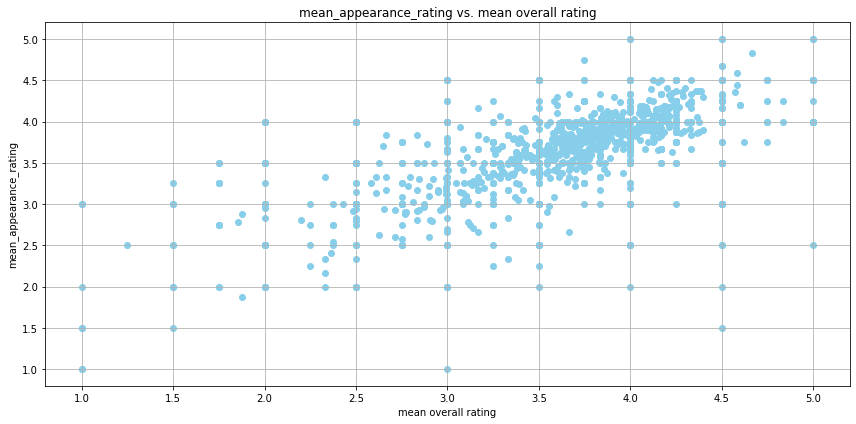

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['mean_overall_rating'], beer_ratings_summary['mean_appearance_rating'], color='skyblue')
plt.title('mean_appearance_rating vs. mean overall rating')
plt.xlabel('mean overall rating')
plt.ylabel('mean_appearance_rating')
plt.grid(True)
plt.tight_layout()
plt.show()

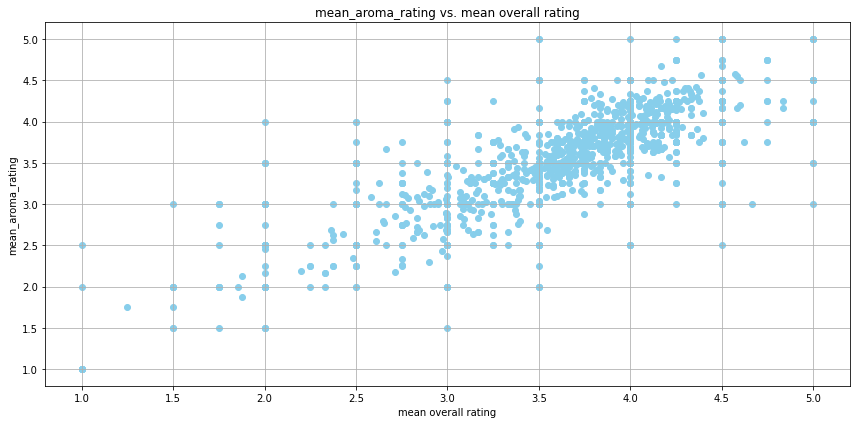

In [27]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['mean_overall_rating'], beer_ratings_summary['mean_aroma_rating'], color='skyblue')
plt.title('mean_aroma_rating vs. mean overall rating')
plt.xlabel('mean overall rating')
plt.ylabel('mean_aroma_rating')
plt.grid(True)
plt.tight_layout()
plt.show()

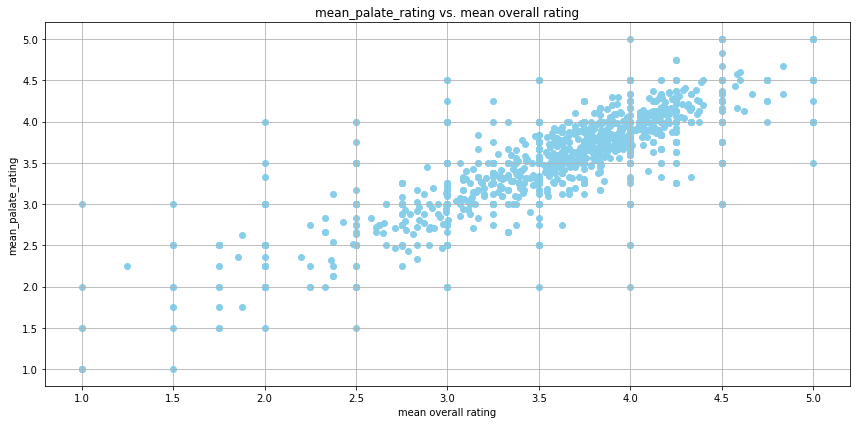

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['mean_overall_rating'], beer_ratings_summary['mean_palate_rating'], color='skyblue')
plt.title('mean_palate_rating vs. mean overall rating')
plt.xlabel('mean overall rating')
plt.ylabel('mean_palate_rating')
plt.grid(True)
plt.tight_layout()
plt.show()

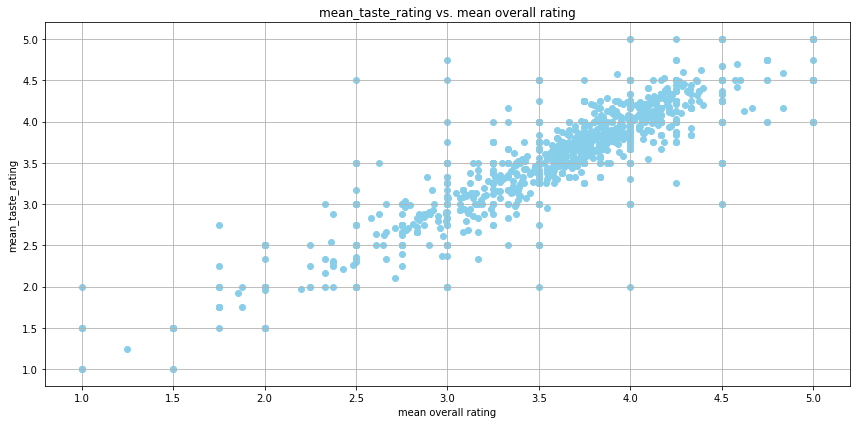

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(beer_ratings_summary['mean_overall_rating'], beer_ratings_summary['mean_taste_rating'], color='skyblue')
plt.title('mean_taste_rating vs. mean overall rating')
plt.xlabel('mean overall rating')
plt.ylabel('mean_taste_rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
train_data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,user/profileName
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,RblWthACoz
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,BeerSox
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,mschofield
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,molegar76
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,Brewbro000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,3.5,12 oz brown longneck with no freshness dating....,Redrover
37481,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,jmerloni
37482,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,UncleJimbo
37483,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,Stockfan42


In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
one_hot_encoded = pd.get_dummies(train_data['beer/style'], prefix='style')

train_data_encoded = pd.concat([train_data, one_hot_encoded], axis=1)
one_hot_encoded_beerId = pd.get_dummies(train_data['beer/beerId'], prefix='style')
train_data_encoded = pd.concat([train_data, one_hot_encoded_beerId], axis=1)
train_data_encoded


,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,style_76963,style_76995,style_76996,style_76997,style_76998,style_76999,style_77116,style_77198,style_77199,style_77207
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,...,0,0,0,0,0,0,0,0,0,0
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
37481,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,...,0,0,0,0,0,0,0,0,0,0
37482,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,...,0,0,0,0,0,0,0,0,0,0
37483,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_data=train_data_encoded

In [33]:
train_data

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,...,style_76963,style_76995,style_76996,style_76997,style_76998,style_76999,style_77116,style_77198,style_77199,style_77207
0,40163,5.00,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0
1,8135,11.00,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
2,10529,4.70,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
3,44610,4.40,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,...,0,0,0,0,0,0,0,0,0,0
4,37062,4.40,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,35175,5.50,22450,3268,Blackberry Scottish-Style,Fruit / Vegetable Beer,4.0,3.5,3.5,3.5,...,0,0,0,0,0,0,0,0,0,0
37481,23666,8.50,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.0,3.5,4.5,...,0,0,0,0,0,0,0,0,0,0
37482,47720,4.75,1154,394,Stoudt's Fest,MÃ¤rzen / Oktoberfest,4.0,3.5,4.0,4.5,...,0,0,0,0,0,0,0,0,0,0
37483,33233,11.20,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:

train_data['review/text'] = train_data['review/text'].str.lower()

train_data['review/text'] = train_data['review/text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

stop_words = set(stopwords.words('english'))
train_data['review/text'] = train_data['review/text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
tfidf_features = tfidf_vectorizer.fit_transform(train_data['review/text'])


In [36]:
X = pd.concat([pd.DataFrame(tfidf_features.toarray()), train_data], axis=1)

In [37]:
X

,0,1,2,3,4,5,6,7,8,9,...,style_76963,style_76995,style_76996,style_76997,style_76998,style_76999,style_77116,style_77198,style_77199,style_77207
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.125853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.204489,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37480,0.000000,0.137191,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
37481,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
37482,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
37483,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X=X.drop(['index','beer/beerId','beer/brewerId','beer/name','beer/style','review/text','user/profileName'],axis =1)

In [39]:
y = train_data['review/overall']


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,style_76963,style_76995,style_76996,style_76997,style_76998,style_76999,style_77116,style_77198,style_77199,style_77207
35708,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1366,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2498,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12307,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5416,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6265,0.0,0.0,0.178484,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11284,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
860,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [44]:

y_pred_LR = model.predict(X_test)

mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print("Mean Squared Error:", mse_LR)
print("R-squared (R2) Score:", r2_LR)


Mean Squared Error: 2.676452982019166e-12
R-squared (R2) Score: 0.9999999999944629


C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
y_pred_LR

array([4.       , 4.5      , 4.5      , ..., 3.4999925, 4.       ,
       4.5      ])

In [46]:
differences = np.abs(y_pred_LR - y_test)

under_threshold = np.sum(differences < 0.25)

above_threshold = np.sum(differences >= 0.25)

print("Predictions with a difference less than 0.25:", under_threshold)
print("Predictions with a difference of 0.25 or greater:", above_threshold)

Predictions with a difference less than 0.25: 7497
Predictions with a difference of 0.25 or greater: 0


# K Nearest Neighbors

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [48]:
knn_model = KNeighborsRegressor(n_neighbors=10)  
knn_model.fit(X_train, y_train)

y_pred_KNN = knn_model.predict(X_test)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
print("Mean Squared Error:", mse_KNN)
r2_KNN = r2_score(y_test, y_pred_KNN)
print("R-squared (R2) Score:", r2_KNN)

C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error: 0.03522242230225423
R-squared (R2) Score: 0.9271304424876549


In [49]:
differences = np.abs(y_pred_KNN - y_test)

under_threshold = np.sum(differences < 0.5)

above_threshold = np.sum(differences >= 0.5)

print("Predictions with a difference less than 0.5:", under_threshold)
print("Predictions with a difference of 0.5 or greater:", above_threshold)

Predictions with a difference less than 0.5: 7289
Predictions with a difference of 0.5 or greater: 208


#  Decision Tree


In [50]:
from sklearn.tree import DecisionTreeRegressor


In [51]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeRegressor(random_state=42)

In [52]:
y_pred_DT = dt_model.predict(X_test)
mse_DT = mean_squared_error(y_test, y_pred_DT)
print("Mean Squared Error:", mse_DT)
r2_DT = r2_score(y_test, y_pred_DT)
print("R-squared (R2) Score:", r2_DT)

Mean Squared Error: 0.0
R-squared (R2) Score: 1.0


C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [53]:
differences = np.abs(y_pred_DT - y_test)

under_threshold = np.sum(differences < 0.5)

above_threshold = np.sum(differences >= 0.5)

print("Predictions with a difference less than 0.55:", under_threshold)
print("Predictions with a difference of 0.55 or greater:", above_threshold)

Predictions with a difference less than 0.55: 7497
Predictions with a difference of 0.55 or greater: 0


# Tensor Flow

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\kushw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
model_TF = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

In [57]:
model_TF.compile(optimizer='adam', loss='mean_squared_error')


In [58]:
model_TF.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6709 - val_loss: 0.2279
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1667 - val_loss: 0.1544
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0843 - val_loss: 0.1118
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0467 - val_loss: 0.0820
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0383 - val_loss: 0.0839
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0354 - val_loss: 0.0684
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0329 - val_loss: 0.0736
Epoch 8/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0309 - val_loss: 0.0617
Epoch 9/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0293 - val_loss: 0.0710
Epoch 10/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0256 - val_loss: 0.0751

In [59]:
y_pred_TF = model_TF.predict(X_test_scaled)
mse_TF = mean_squared_error(y_test, y_pred_TF)
print("Mean Squared Error:", mse_TF)
r2_TF = r2_score(y_test, y_pred_TF)
print("R-squared (R2) Score:", r2_TF)

235/235 [==============================] - 0s 1ms/step
Mean Squared Error: 0.029055460615098488
R-squared (R2) Score: 0.9398888997420233


In [60]:
y_pred_TF

array([[3.2529058],
       [4.3653975],
       [4.582384 ],
       ...,
       [3.6155508],
       [3.9042068],
       [4.459923 ]], dtype=float32)

In [61]:
y_test

34569    4.0
12299    4.5
9767     4.5
6111     4.0
8565     3.5
        ... 
8552     3.5
8904     4.0
10657    3.5
5511     4.0
35497    4.5
Name: review/overall, Length: 7497, dtype: float64

In [62]:
np.abs(y_pred_TF.flatten() - y_test.values)

array([0.74709415, 0.13460255, 0.08238411, ..., 0.11555076, 0.09579325,
       0.04007721])

In [63]:
differences = np.abs(y_pred_TF.flatten() - y_test.values)
under_threshold = np.sum(differences < 0.5)

above_threshold = np.sum(differences >= 0.5)

print("Predictions with a difference less than 0.5:", under_threshold)
print("Predictions with a difference of 0.5 or greater:", above_threshold)

Predictions with a difference less than 0.5: 7357
Predictions with a difference of 0.5 or greater: 140
